In [1]:
#Module 5 Challenge Plotting

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
#import numpy as np


In [3]:
#Reading in the DataSets
mouse_metadata_data = pd.read_csv("data/Mouse_metadata.csv")
study_results_data = pd.read_csv("data/Study_results.csv")

In [4]:
#Merging mouse_metadata_data and study_results_data on Mouse ID
mouse_data = pd.merge(mouse_metadata_data, study_results_data, on="Mouse ID")
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#Finding the number of mice
mouse_ID = mouse_data["Mouse ID"].unique()
mice_number = len(mouse_ID)
print(mice_number)

249


In [6]:
#Looking for duplicates (the same mouse with two timepoints that are the same)
#Looked up how to find duplicates on Stack Overflow
duplicates = mouse_data[mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
#Finding the ID of the mouse that has two timepoints that are the same
duplicate_ID = duplicates["Mouse ID"].unique()
print(duplicate_ID)

['g989']


In [7]:
#Optional, display all of the data for Mouse g898
g989_data = mouse_data[mouse_data["Mouse ID"] == "g989"]
print(g989_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [8]:
#Cleaning the dataframe, dropping the mouse with duplicate data
#I looked up how to drop a row with a specific value in a column on Stack Overflow
mouse_data = mouse_data[mouse_data["Mouse ID"] !="g989"]
#Finding the new number of mice
mouse_ID = mouse_data["Mouse ID"].unique()
mice_number = len(mouse_ID)
print(mice_number)

248


In [9]:
#Summary statistics for tumor volume by drug regimen
#Setting the drug regimen as the index column
mouse_data_drug_index = mouse_data.set_index("Drug Regimen")

#Finding summary statistics
#Finding the mean Tumor Volume for each drug regime
mean_tumor_volume = mouse_data_drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#Finding the median Tumor Volume for each drug regime
median_tumor_volume = mouse_data_drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#Finding the variance of Tumor Volume for each drug regime, looked up the .var() on pandas.pydata.org
variance_tumor_volume = mouse_data_drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#Finding the standard deviation of Tumor Volume for each drug regime
stdev_tumor_volume = mouse_data_drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#Finding the standard error(SEM) of Tumor Volume for each drug regime
sem_tumor_volume = mouse_data_drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Creating a single dataframe to include the summary statistics of tumor volume by drug regimen
tumor_volume_summary_statistics = pd.merge(mean_tumor_volume, median_tumor_volume, on="Drug Regimen", how="left")
tumor_volume_summary_statistics = pd.merge(tumor_volume_summary_statistics, variance_tumor_volume, on="Drug Regimen", how="left")
tumor_volume_summary_statistics = tumor_volume_summary_statistics.rename(columns={"Tumor Volume (mm3)_x":"Mean",
                                                                                 "Tumor Volume (mm3)_y":"Median",
                                                                                 "Tumor Volume (mm3)":"Variance"})
tumor_volume_summary_statistics = pd.merge(tumor_volume_summary_statistics, stdev_tumor_volume, on="Drug Regimen", how="left") 
tumor_volume_summary_statistics = tumor_volume_summary_statistics.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
tumor_volume_summary_statistics = pd.merge(tumor_volume_summary_statistics, sem_tumor_volume, on="Drug Regimen", how="left") 
tumor_volume_summary_statistics = tumor_volume_summary_statistics.rename(columns={"Tumor Volume (mm3)":"SEM"})
tumor_volume_summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


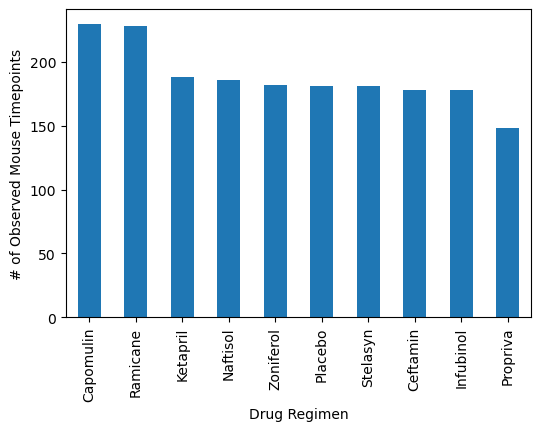

In [10]:
#Bar chart showing Mouse ID/Timepoints for each Drug Regime using Pandas DataFrame.plot() method
#mouse_data = mouse_data.set_index("Drug Regimen")
#Creating the dataframe
drug_by_timepoint = mouse_data.groupby("Drug Regimen")["Timepoint"].count()
drug_by_timepoint = drug_by_timepoint.sort_values(ascending=False)
drug_by_timepoint = pd.DataFrame(drug_by_timepoint)

#Creating the chart
drug_by_timepoint_chart = drug_by_timepoint.plot(kind="bar", figsize=(6,4), legend=False)
drug_by_timepoint_chart.set_xlabel("Drug Regimen")
drug_by_timepoint_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show(drug_by_timepoint_chart)

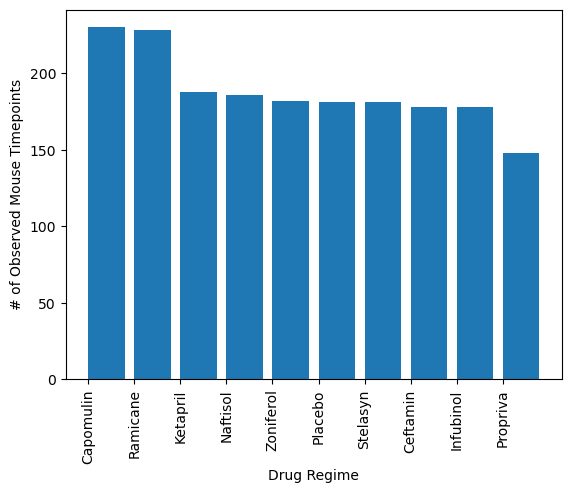

In [11]:
# Bar chart showing Mouse ID/Timepoints for each Drug Regime using Matplotlib's pyplot method
#drug_by_timepoint = pd.DataFrame(drug_by_timepoint)
x_axis = drug_by_timepoint.index
y_axis = drug_by_timepoint["Timepoint"]
plt.bar(x_axis, y_axis, align="edge")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regime")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

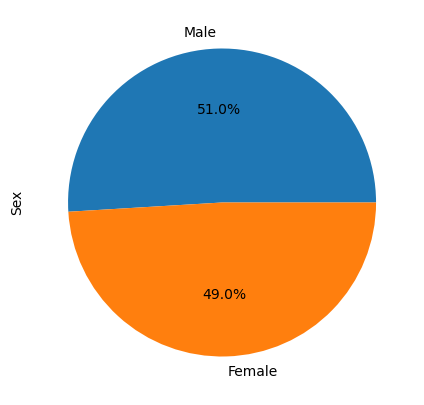

In [12]:
#Distribution of mice in the study by male and female using Pandas DataFrame.plot() method
#Creating the dataframe
sex_distribution = mouse_data['Sex'].value_counts()
sex_distribution = pd.DataFrame(sex_distribution)
sex_distribution = sex_distribution.rename_axis("male_female")
sex_distribution = sex_distribution.rename(columns={"count": "Sex"})

#Creating the chart, looked up on pandas.pydata.org for some formatting
sex_distribution_chart = sex_distribution.plot.pie(y="Sex", figsize=(5,5), legend=False, autopct='%1.1f%%') 
plt.show()

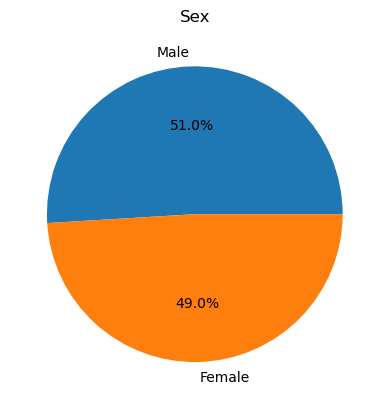

In [13]:
#Distribution of mice in the study by male and female using Matplotlib's pyplot method, looked at matplotlib.org/ for how to format
labels = sex_distribution.index
sizes = sex_distribution["Sex"]
fig, sex_distribution_chart = plt.subplots()
sex_distribution_chart.pie(sizes, labels=labels, autopct='%1.1f%%')
sex_distribution_chart.set_title("Sex")
plt.show()

In [14]:
#Creating a dataframe that includes the last timepoint for each mouse
last_time_data = mouse_data.groupby("Mouse ID")["Timepoint"].max()

#Merging last_time_data with original merged dataframe (mouse_data)
mouse_lasttime_data = pd.merge(mouse_data, last_time_data, on="Mouse ID", how="left")
#Renaming variables, looked up inplace=True on Stack Overflow after I kept on getting an error message
mouse_lasttime_data.rename(columns={"Timepoint_x": "Timepoint", 
                                    "Timepoint_y": "Last_Timepoint"}, 
                                   inplace=True)
#Removing rows that are not the last time point
mouse_lasttime_data = mouse_lasttime_data[mouse_lasttime_data["Timepoint"] == mouse_lasttime_data["Last_Timepoint"]]

#Resetting the index
mouse_lasttime_data = mouse_lasttime_data.reset_index()
mouse_lasttime_data = mouse_lasttime_data.drop("index", axis=1)

In [15]:
#Creating a list of treatment names, and an empty list for final tumor volume
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments_all = mouse_lasttime_data["Drug Regimen"]
tumor_volume = []
#Creating a loop to find the final tumor volume for each mouse, looked up .iterrows() on pandas.pydata.org/docs
for index, row in mouse_lasttime_data.iterrows():
    mouse_id = row["Mouse ID"]
    volume = row["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
#Merging the two lists into a dataframe
treatment_final_volume = pd.DataFrame({'Drug Regimen': treatments_all, 'Tumor Volume (mm3)': tumor_volume})

In [16]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot
#Finding any outliers for final tumor volume for treatment with Capomulin, Ramicane, Infubinol, and Ceftamin

#Empty lists to store the results
first_quartile = []
third_quartile = []
IQR = []
outliers = []

for treatment in treatments:
        treatment_tumor_volume = treatment_final_volume[treatment_final_volume["Drug Regimen"].isin([treatment]) == True]
        #Finding the quartiles and interquartile range
        #To find the outliers and IQR I use code modified from the lesson 5 "Quartiles_and_Outliers" in-class activity
        quartiles = treatment_tumor_volume["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        #Finding outliers
        potential_outliers = treatment_tumor_volume[(treatment_tumor_volume["Tumor Volume (mm3)"]<lower_bound)|(treatment_tumor_volume["Tumor Volume (mm3)"]>upper_bound)]
        #Storing the results in lists
        first_quartile.append(lowerq)
        third_quartile.append(upperq)
        IQR.append(iqr)
        outliers.append(potential_outliers)
          
#Creating a for loop to print out the results
for treatment, first, third, range, outlier  in zip(treatments, first_quartile, third_quartile, IQR, outliers):
    print(f"For the treatment {treatment}: the first quartile is {first:.2f}, the third quartile is {third:.2f}, the IQR is {range:.2f}, and the potential outliers are, {outlier}\n")


For the treatment Capomulin: the first quartile is 32.38, the third quartile is 40.16, the IQR is 7.78, and the potential outliers are, Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []

For the treatment Ramicane: the first quartile is 31.56, the third quartile is 40.66, the IQR is 9.10, and the potential outliers are, Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []

For the treatment Infubinol: the first quartile is 54.05, the third quartile is 65.53, the IQR is 11.48, and the potential outliers are,    Drug Regimen  Tumor Volume (mm3)
74    Infubinol           36.321346

For the treatment Ceftamin: the first quartile is 48.72, the third quartile is 64.30, the IQR is 15.58, and the potential outliers are, Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []



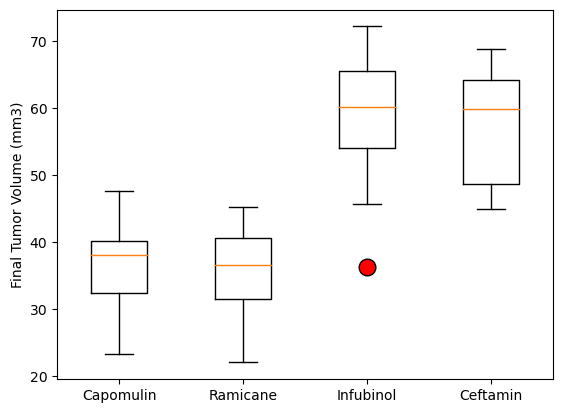

In [17]:
#Creating box plots for Capomulin, Ramicane, Infubinol, and Ceftamin
#Making a list for each of the four drugs
capomulin_final_volume=treatment_final_volume[treatment_final_volume["Drug Regimen"].isin(["Capomulin"]) == True]
capomulin = list(capomulin_final_volume["Tumor Volume (mm3)"].values)
ramicane_final_volume=treatment_final_volume[treatment_final_volume["Drug Regimen"].isin(["Ramicane"]) == True]
ramicane = list(ramicane_final_volume["Tumor Volume (mm3)"].values)
infubinol_final_volume=treatment_final_volume[treatment_final_volume["Drug Regimen"].isin(["Infubinol"]) == True]
infubinol = list(infubinol_final_volume["Tumor Volume (mm3)"].values)
ceftamin_final_volume=treatment_final_volume[treatment_final_volume["Drug Regimen"].isin(["Ceftamin"]) == True]
ceftamin = list(ceftamin_final_volume["Tumor Volume (mm3)"].values)

#Putting onto one box plot, used the documentation on boxplots from https://matplotlib.org/ and barrowed the code on how to do this
data = [capomulin, ramicane, infubinol, ceftamin]
fig, ax = plt.subplots()
#Looked up on Stack Overflow how to format the marker
ax.boxplot(data, flierprops={"marker": "o", "markersize": 12, "markerfacecolor": "red"})

#Adding labels and formatting outliers
tick_locations = [1,2,3,4]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

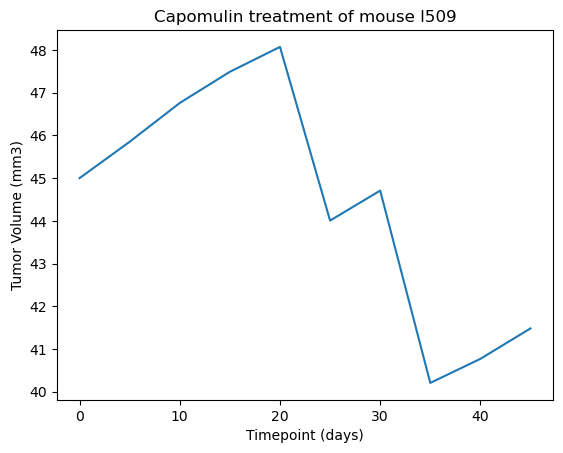

In [18]:
#Line plot for tumor volume vs. time for mouse treated with Capomulin (mouse l509)
#Getting data for only l509
l509=mouse_data[mouse_data["Mouse ID"].isin(["l509"]) == True]
tumor_size = l509["Tumor Volume (mm3)"]
time = l509["Timepoint"]
l509_plot, = plt.plot(time, tumor_size)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

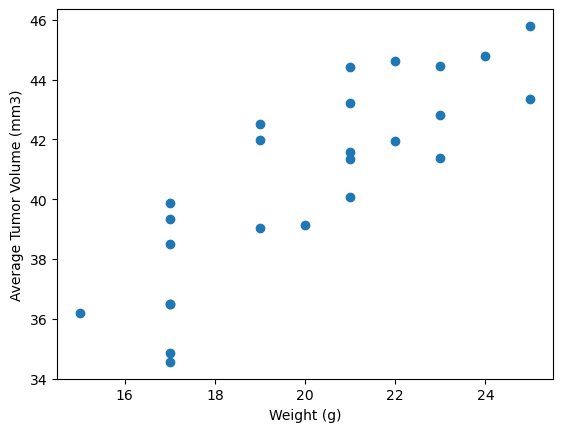

In [19]:
#Scatter plot for Capomulin treatment of mouse weight and average observed tumor volume
#Creating a data frame with only mice who received the Capomulin treatment
capomulin_treatment=mouse_data[mouse_data["Drug Regimen"].isin(["Capomulin"]) == True]

#Finding the average weight of each mouse in the Capomulin treatment group
mouse_weight=capomulin_treatment.groupby("Mouse ID")["Weight (g)"].mean()

#Finding the average tumor size per mouse in the Capomulin treatment group
average_tumor_volume=capomulin_treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Creating the Scatter plot
capomulin_plot = plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [20]:
#Finding the correlation coefficient between mouse weight and average observed tumor volume for the Capomulin treatment group
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Calculating the linear regression model for mouse weight and average observed tumor volume for the Capomulin treatment group
#I barrowed the code for a regression line from the Module 5, lesson 3, in-class exercise "Fits and Regression"
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The linear regression model between mouse weight and average tumor volume is ",line_eq)

The correlation between mouse weight and the average tumor volume is 0.84
The linear regression model between mouse weight and average tumor volume is  y = 0.95x + 21.55


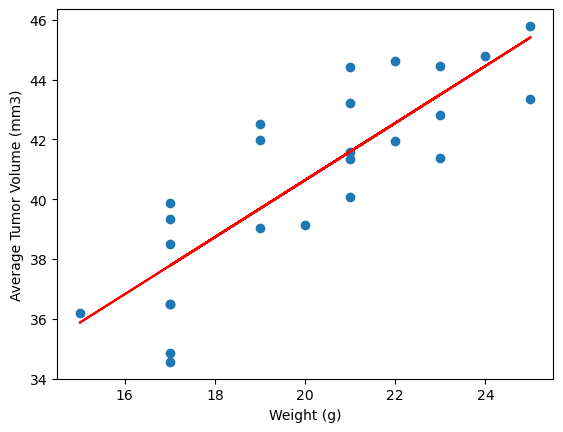

In [21]:
#I barrowed the code to place a regression line on a plot from the Module 5, lesson 3, in-class exercise "Fits and Regression"
capomulin_plot = plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")